## Business Understanding

Di era ekonomi global dan keterbukaan ini menjadikan orang-orang memiliki waktu yang singkat untuk berbagai kepentingan, seperti berbisnis dan berwisata. Bisnis penerbangan komersil sebagai bisnis yang melayani *demand* orang-orang yang melakukan perjalanan dipengaruhi oleh tingkat kepuasan penumpang. Kepuasan penumpang maskapai penerbangan komersil bisa menjadi variabel penting untuk menilai kesuksesan maskapai penerbangan tersebut. Pemahaman akan faktor-faktor penting yang mempengaruhi kepuasan penumpang adalah fundamental untuk membuat keputusan bisnis karena dapat mempengaruhi persepsi penumpang dan menjamin *sustainability* maskapai penerbangan. Oleh karena itu dirumuskan dua *Business Problems* yaitu

## Business Problems:
1. Improving Flight Experience
2. Improving Customer Satisfaction

### A. Flight Experience Analysis
1. Top 3 fitur yang terbanyak total skor dan grafik kepuasan
2. Bottom 3 fitur yang terbawah total skor dan grafik kepuasan
3. Fitur manakah yang membuat customer economy class puas atau tidak puas?
4. Fitur manakah yang membuat customer business class puas atau tidak puas?

### B. Customer Satisfaction Analysis
1. Bagaimana kepuasan penumpang berbasis gender?
2. Bagaimana tipe customer (Returning atau New) mempengaruhi kepuasan?
3. Apakah umur customer mempengaruhi kepuasan?
4. Apakah tipe perjalanan mempengaruhi kepuasan?
5. Apakah kelas mempengaruhi kepuasan penumpang?
6. Apakah jarak penerbangan mempengaruhi kepuasan penumpang?
7. Apakah penundaan penerbangan mempengaruhi kepuasan penumpang?
8. Fitur manakah yang mempengaruhi kepuasan penumpang?

### Data Preparation
- Pada kolom 'Customer Type' data 'Loyal Customer' akan diganti dengan 'Returning Customer' dan 'disloyal Customer' akan diganti menjadi 'New Customer'
- Membuat kolom 'Total Delay' = 'Arrival Delay in Minutes' + 'Departure Delay in Minutes' dan drop kolom 'Arrival Delay in Minutes' dan kolom 'Departure Delay in Minutes'
- Pada kolom 'Class', data 'Eco Plus' akan diubah menjadi 'Eco' karena tidak ada keterangan yang membedakan antara 'Eco Plus' dengan 'Eco'
- Skor kepuasan dari 1= Tidak Puas, 2= Kurang Puas , 3= Netral, 4= Puas, 5= Sangat Puas dan 0 = Tidak tahu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Airline Passenger.csv', index_col=0)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [4]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [5]:
featureDesc =[]
for i in df.columns:
    featureDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum()/len(df))*100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
pd.DataFrame(featureDesc, columns=['Features', 'DataType', 'Null',
                                 'NullPrecentage', 'Unique', 'UniqueSample'])

,Features,DataType,Null,NullPrecentage,Unique,UniqueSample
0,id,int64,0,0.0,103904,"[15047, 6310]"
1,Gender,object,0,0.0,2,"[Male, Female]"
2,Customer Type,object,0,0.0,2,"[disloyal Customer, Loyal Customer]"
3,Age,int64,0,0.0,75,"[41, 49]"
4,Type of Travel,object,0,0.0,2,"[Business travel, Personal Travel]"
5,Class,object,0,0.0,3,"[Eco, Eco Plus]"
6,Flight Distance,int64,0,0.0,3802,"[613, 1604]"
7,Inflight wifi service,int64,0,0.0,6,"[3, 2]"
8,Departure/Arrival time convenient,int64,0,0.0,6,"[3, 2]"
9,Ease of Online booking,int64,0,0.0,6,"[4, 2]"


Ditemukan sebanyak 0.3% data Null yang ditemukan sehingga akan drop baris yang memiliki data Null di kolom 'Arrival Delay in Minutes'

In [6]:
df = df.dropna(axis=0)

In [7]:
df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103594 non-null  int64  
 1   Gender                             103594 non-null  object 
 2   Customer Type                      103594 non-null  object 
 3   Age                                103594 non-null  int64  
 4   Type of Travel                     103594 non-null  object 
 5   Class                              103594 non-null  object 
 6   Flight Distance                    103594 non-null  int64  
 7   Inflight wifi service              103594 non-null  int64  
 8   Departure/Arrival time convenient  103594 non-null  int64  
 9   Ease of Online booking             103594 non-null  int64  
 10  Gate location                      103594 non-null  int64  
 11  Food and drink                     1035

In [9]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,64942.428625,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,37460.816597,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
# Mengganti data kolom 'Customer Type'
df.replace({'Customer Type':{'Loyal Customer' : 'Returning Customer', 'disloyal Customer':'New Customer'}}, inplace=True)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Returning Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,New Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Returning Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Returning Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Returning Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [11]:
# Membuat kolom baru 'Total Delay in Minutes' dan drop kolom 'Arrival Delay in Minutes' dan 'Departure Delay in Minutes'
df['Total Delay in Minutes'] = df['Arrival Delay in Minutes'] + df['Departure Delay in Minutes']
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay in Minutes
0,70172,Male,Returning Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,43.0
1,5047,Male,New Customer,25,Business travel,Business,235,3,2,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,7.0
2,110028,Female,Returning Customer,26,Business travel,Business,1142,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,0.0
3,24026,Female,Returning Customer,25,Business travel,Business,562,2,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,20.0
4,119299,Male,Returning Customer,61,Business travel,Business,214,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,0.0


In [12]:
df.drop(columns=['Departure Delay in Minutes','Arrival Delay in Minutes'], inplace=True)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Total Delay in Minutes
0,70172,Male,Returning Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,5,4,3,4,4,5,5,neutral or dissatisfied,43.0
1,5047,Male,New Customer,25,Business travel,Business,235,3,2,3,...,1,1,1,5,3,1,4,1,neutral or dissatisfied,7.0
2,110028,Female,Returning Customer,26,Business travel,Business,1142,2,2,2,...,5,5,4,3,4,4,4,5,satisfied,0.0
3,24026,Female,Returning Customer,25,Business travel,Business,562,2,5,5,...,2,2,2,5,3,1,4,2,neutral or dissatisfied,20.0
4,119299,Male,Returning Customer,61,Business travel,Business,214,3,3,3,...,5,3,3,4,4,3,3,3,satisfied,0.0


### A. Flight Experience

In [13]:
#Membuat grafik dengan kategori masing-masing kolom penilaian dan value jumlah total skor
df.columns[7:23]

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction',
       'Total Delay in Minutes'],
      dtype='object')

In [39]:
totalScore =[]
for i in df.columns[7:21]:
    totalScore.append([
        i,
        df[i].mean(),
        df[i].mode()[0]])
df_totalscore = pd.DataFrame(totalScore, columns=['Features', 'Mean', 'Mode'])
df_totalscore.sort_values(by=['Mean'], ascending=False)

,Features,Mean,Mode
12,Inflight service,3.640761,4
10,Baggage handling,3.631687,4
6,Seat comfort,3.439765,4
8,On-board service,3.382609,4
7,Inflight entertainment,3.358341,4
9,Leg room service,3.351401,4
11,Checkin service,3.304323,4
13,Cleanliness,3.286397,4
5,Online boarding,3.250497,4
4,Food and drink,3.202126,4


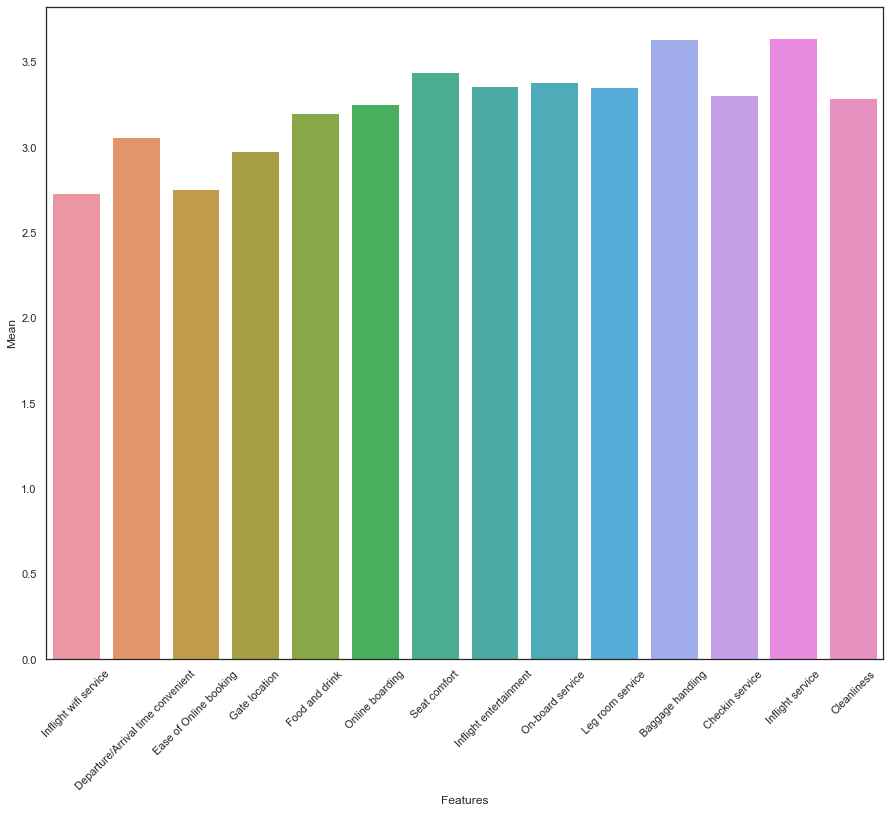

In [40]:
plt.figure(figsize=(15, 12))
sns.barplot(x='Features', y='Mean', data=df_totalscore)
plt.xticks(rotation=45)
plt.savefig('Grafik Rata-Rata Score.png')
plt.show()

- Didapatkan Top 3: Inflight Service, Baggage Handling, dan Seat Comfort
- Didapatkan Bottom 3: Gate Location, Ease of Online Booking, Inflight Wifi Service

## Insight 1:
- Fitur Inflight service dengan jumlah skor	377161 dan rata-rata skor 3.64, Baggage handling dengan jumlah skor 376221 dan rata-rata skor 3.63, serta Seat comfort	dengan jumlah skor 356339 dan rata-rata skor 3.4 adalah tiga fitur teratas yang menandakan 3 fitur tersebut memiliki skor kepuasan tertinggi
- Fitur Gate location dengan jumlah skor 308402 dan rata-rata skor 2.97, Ease of Online booking	dengan jumlah skor 285607 dan rata-rata skor 2.75, dan Inflight wifi service dengan jumlah skor	282786 dan rata-rata skor 2.72 adalah tiga fitur terbawah yang menandakan 3 fitur tersebut memiliki skor kepuasan terendah

In [16]:
#Subset dataframe Class Economy
df_eco = df[(df['Class']=='Eco Plus') | (df['Class']=='Eco')]
df_eco

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Total Delay in Minutes
0,70172,Male,Returning Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,5,4,3,4,4,5,5,neutral or dissatisfied,43.0
5,111157,Female,Returning Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,1,3,4,4,4,4,1,neutral or dissatisfied,0.0
6,82113,Male,Returning Customer,47,Personal Travel,Eco,1276,2,4,2,...,2,2,3,3,4,3,5,2,neutral or dissatisfied,32.0
9,65725,Male,New Customer,20,Business travel,Eco,1061,3,3,3,...,3,2,2,3,4,4,3,2,neutral or dissatisfied,0.0
10,34991,Female,New Customer,24,Business travel,Eco,1182,4,5,5,...,2,2,3,3,5,3,5,2,neutral or dissatisfied,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103895,66030,Female,New Customer,24,Business travel,Eco,1055,1,1,1,...,1,1,3,3,5,5,4,1,neutral or dissatisfied,23.0
103896,71445,Male,Returning Customer,57,Business travel,Eco,867,4,5,5,...,4,4,3,4,3,1,3,4,neutral or dissatisfied,0.0
103898,60666,Male,Returning Customer,50,Personal Travel,Eco,1620,3,1,3,...,2,2,4,3,4,2,4,2,neutral or dissatisfied,0.0
103899,94171,Female,New Customer,23,Business travel,Eco,192,2,1,2,...,2,2,3,1,4,2,3,2,neutral or dissatisfied,3.0


In [17]:
df_eco =df_eco.replace({'Class':{'Eco Plus' : 'Eco'}})
df_eco

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Total Delay in Minutes
0,70172,Male,Returning Customer,13,Personal Travel,Eco,460,3,4,3,...,5,5,4,3,4,4,5,5,neutral or dissatisfied,43.0
5,111157,Female,Returning Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,1,3,4,4,4,4,1,neutral or dissatisfied,0.0
6,82113,Male,Returning Customer,47,Personal Travel,Eco,1276,2,4,2,...,2,2,3,3,4,3,5,2,neutral or dissatisfied,32.0
9,65725,Male,New Customer,20,Business travel,Eco,1061,3,3,3,...,3,2,2,3,4,4,3,2,neutral or dissatisfied,0.0
10,34991,Female,New Customer,24,Business travel,Eco,1182,4,5,5,...,2,2,3,3,5,3,5,2,neutral or dissatisfied,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103895,66030,Female,New Customer,24,Business travel,Eco,1055,1,1,1,...,1,1,3,3,5,5,4,1,neutral or dissatisfied,23.0
103896,71445,Male,Returning Customer,57,Business travel,Eco,867,4,5,5,...,4,4,3,4,3,1,3,4,neutral or dissatisfied,0.0
103898,60666,Male,Returning Customer,50,Personal Travel,Eco,1620,3,1,3,...,2,2,4,3,4,2,4,2,neutral or dissatisfied,0.0
103899,94171,Female,New Customer,23,Business travel,Eco,192,2,1,2,...,2,2,3,1,4,2,3,2,neutral or dissatisfied,3.0


In [18]:
# Fitur manakah yang membuat customer economy class puas atau tidak puas?
totalScoreEco =[]
for i in df_eco.columns[7:21]:
    totalScoreEco.append([
        i,
        df_eco[i].sum(),
        df_eco[i].mode()[0]])
df_totalscoreEco = pd.DataFrame(totalScoreEco, columns=['Features', 'Total Score', 'Mode'])
df_totalscoreEco.sort_values(by=['Total Score'], ascending=False)

,Features,Total Score,Mode
12,Inflight service,186734,4
10,Baggage handling,185875,4
1,Departure/Arrival time convenient,173072,4
6,Seat comfort,170056,4
13,Cleanliness,168203,4
8,On-board service,168156,4
11,Checkin service,168002,4
7,Inflight entertainment,167832,4
4,Food and drink,167131,4
9,Leg room service,166654,3


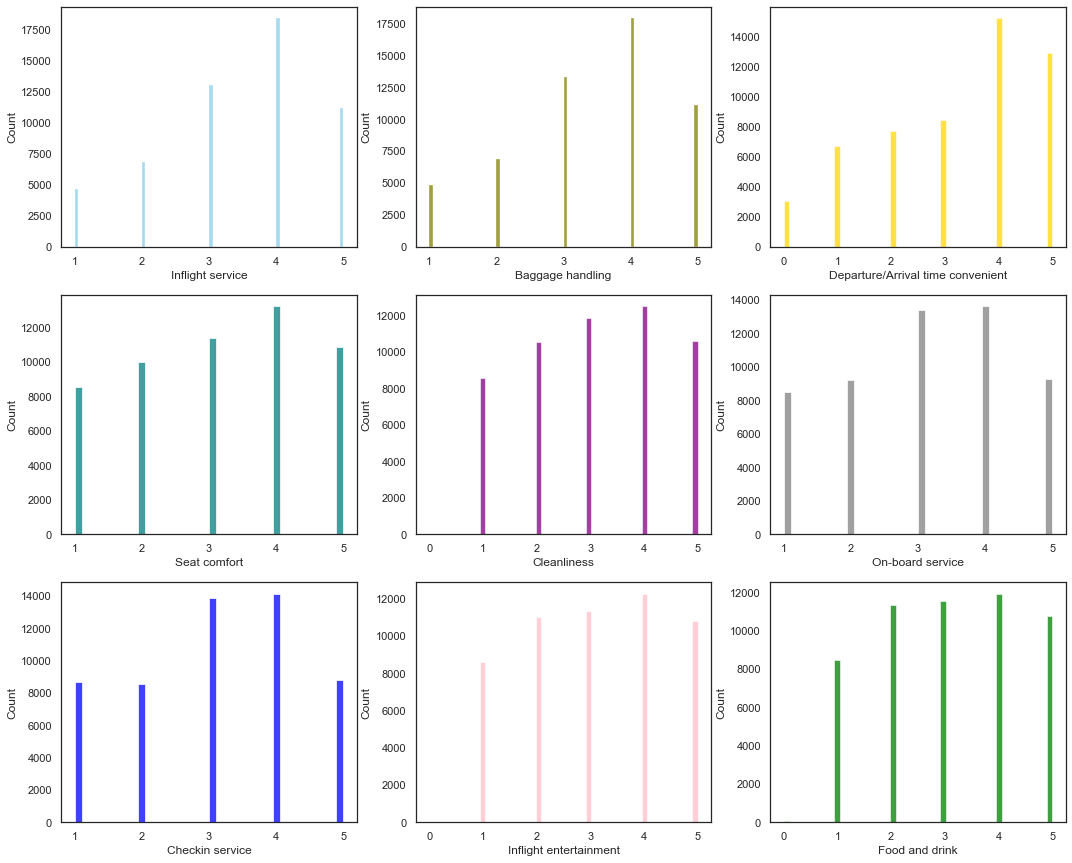

In [19]:
# Persebaran skor di kelas Economy
sns.set(style='white')
fig, axs = plt.subplots(3, 3, figsize=(18, 15))

sns.histplot(data=df_eco, x="Inflight service", color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_eco, x="Baggage handling", color="olive", ax=axs[0, 1])
sns.histplot(data=df_eco, x="Departure/Arrival time convenient", color="gold", ax=axs[0, 2])
sns.histplot(data=df_eco, x="Seat comfort", color="teal", ax=axs[1, 0])
sns.histplot(data=df_eco, x="Cleanliness", color="purple", ax=axs[1, 1])
sns.histplot(data=df_eco, x="On-board service", color="grey", ax=axs[1, 2])
sns.histplot(data=df_eco, x="Checkin service", color="blue", ax=axs[2, 0])
sns.histplot(data=df_eco, x="Inflight entertainment", color="pink", ax=axs[2, 1])
sns.histplot(data=df_eco, x="Food and drink", color="green", ax=axs[2, 2])
plt.savefig('Score Economy 1.png')
plt.show()

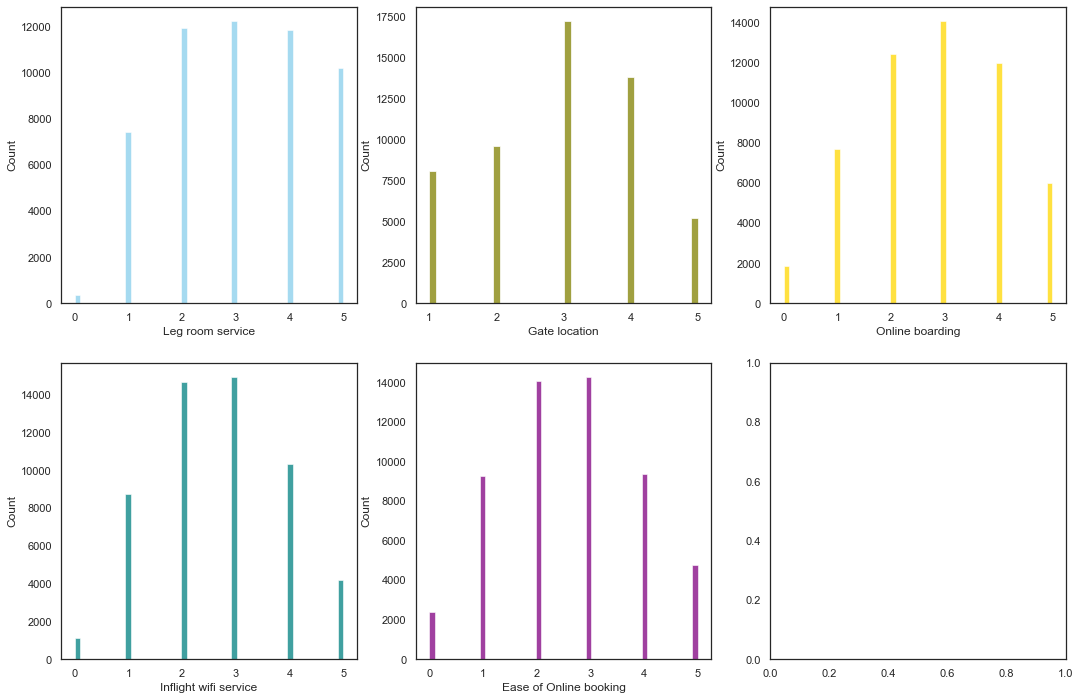

In [20]:
sns.set(style='white')
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

sns.histplot(data=df_eco, x="Leg room service", color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_eco, x="Gate location", color="olive", ax=axs[0, 1])
sns.histplot(data=df_eco, x="Online boarding", color="gold", ax=axs[0, 2])
sns.histplot(data=df_eco, x="Inflight wifi service", color="teal", ax=axs[1, 0])
sns.histplot(data=df_eco, x="Ease of Online booking", color="purple", ax=axs[1, 1])

plt.savefig('Score Economy 2.png')
plt.show()

## Insight 2:
- Penumpang Economy Class puas (memberikan skor 4 sebagai modus data) pada fitur-fitur: Inflight Service, Baggage Handling dan Departure/Arrival time convenient sebagai 3 skor fitur teratas
- Penumpang Economy Class netral (memberikan skor 3 sebagai modus data) pada fitur-fitur: Online Boarding, Inflight wifi service, dan Ease of Online Booking

In [21]:
# Subset data penumpang kelas Business
df_bu = df[df['Class']=='Business']
df_bu.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Total Delay in Minutes
1,5047,Male,New Customer,25,Business travel,Business,235,3,2,3,...,1,1,1,5,3,1,4,1,neutral or dissatisfied,7.0
2,110028,Female,Returning Customer,26,Business travel,Business,1142,2,2,2,...,5,5,4,3,4,4,4,5,satisfied,0.0
3,24026,Female,Returning Customer,25,Business travel,Business,562,2,5,5,...,2,2,2,5,3,1,4,2,neutral or dissatisfied,20.0
4,119299,Male,Returning Customer,61,Business travel,Business,214,3,3,3,...,5,3,3,4,4,3,3,3,satisfied,0.0
7,96462,Female,Returning Customer,52,Business travel,Business,2035,4,3,4,...,5,5,5,5,5,4,5,4,satisfied,4.0


In [22]:
# Fitur manakah yang membuat customer business class puas atau tidak puas?
totalScoreBus =[]
for i in df_bu.columns[7:21]:
    totalScoreBus.append([
        i,
        df_bu[i].sum(),
        df_bu[i].mode()[0]])
df_totalscoreBus = pd.DataFrame(totalScoreEco, columns=['Features', 'Total Score', 'Mode'])
df_totalscoreBus.sort_values(by=['Total Score'], ascending=False)

,Features,Total Score,Mode
12,Inflight service,186734,4
10,Baggage handling,185875,4
1,Departure/Arrival time convenient,173072,4
6,Seat comfort,170056,4
13,Cleanliness,168203,4
8,On-board service,168156,4
11,Checkin service,168002,4
7,Inflight entertainment,167832,4
4,Food and drink,167131,4
9,Leg room service,166654,3


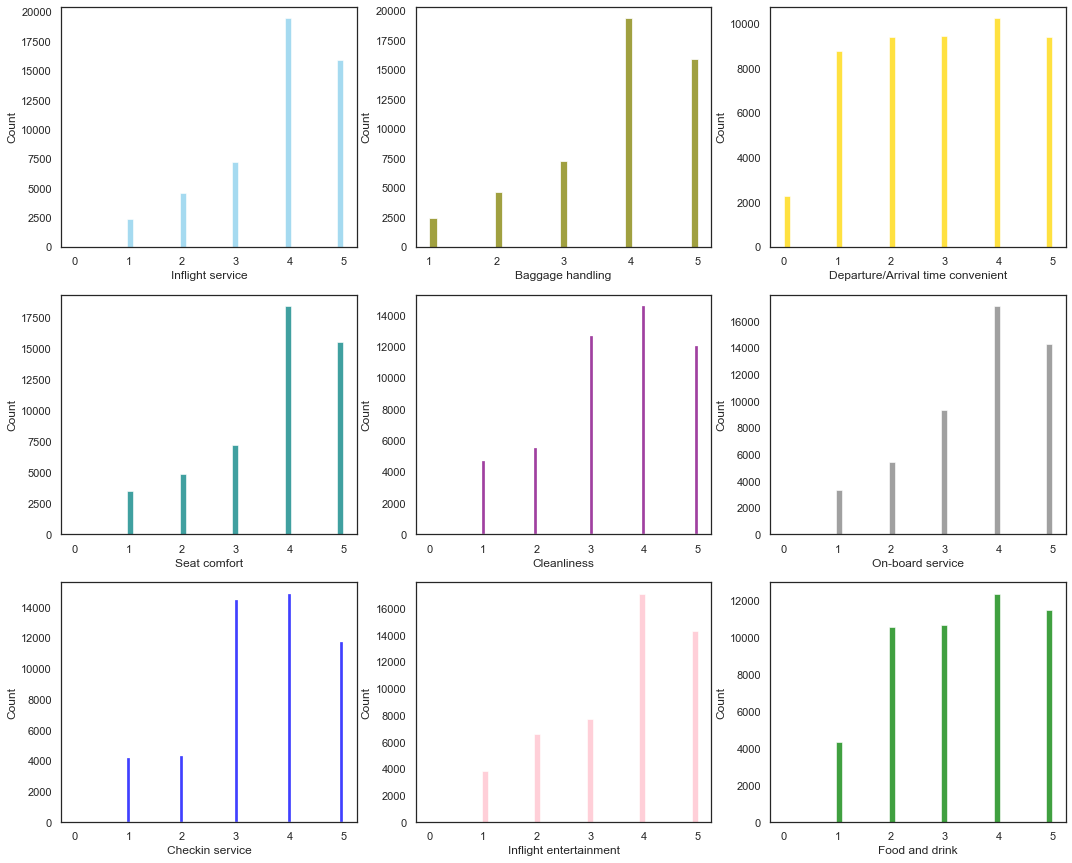

In [23]:
# Persebaran skor di kelas Business
sns.set(style='white')
fig, axs = plt.subplots(3, 3, figsize=(18, 15))

sns.histplot(data=df_bu, x="Inflight service", color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_bu, x="Baggage handling", color="olive", ax=axs[0, 1])
sns.histplot(data=df_bu, x="Departure/Arrival time convenient", color="gold", ax=axs[0, 2])
sns.histplot(data=df_bu, x="Seat comfort", color="teal", ax=axs[1, 0])
sns.histplot(data=df_bu, x="Cleanliness", color="purple", ax=axs[1, 1])
sns.histplot(data=df_bu, x="On-board service", color="grey", ax=axs[1, 2])
sns.histplot(data=df_bu, x="Checkin service", color="blue", ax=axs[2, 0])
sns.histplot(data=df_bu, x="Inflight entertainment", color="pink", ax=axs[2, 1])
sns.histplot(data=df_bu, x="Food and drink", color="green", ax=axs[2, 2])
plt.savefig('Score Business 1.png')
plt.show()

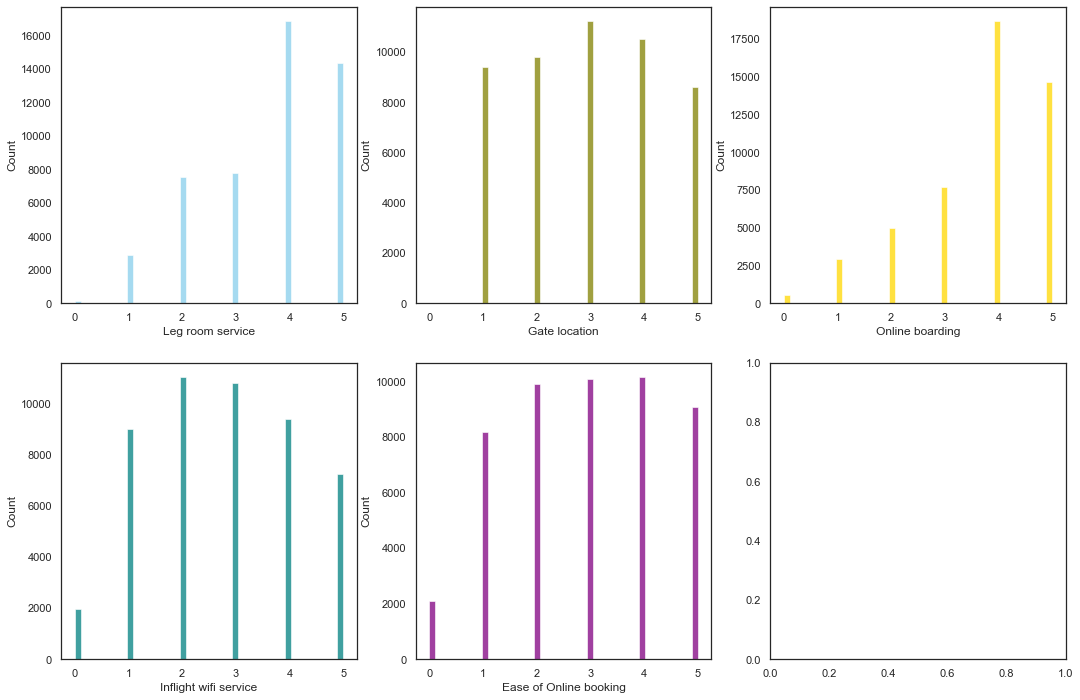

In [24]:
sns.set(style='white')
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

sns.histplot(data=df_bu, x="Leg room service", color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_bu, x="Gate location", color="olive", ax=axs[0, 1])
sns.histplot(data=df_bu, x="Online boarding", color="gold", ax=axs[0, 2])
sns.histplot(data=df_bu, x="Inflight wifi service", color="teal", ax=axs[1, 0])
sns.histplot(data=df_bu, x="Ease of Online booking", color="purple", ax=axs[1, 1])

plt.savefig('Score Business 2.png')
plt.show()

## Insight 3:
- Penumpang Business Class puas (memberikan skor 4 sebagai modus data) pada fitur-fitur: Inflight Service, Baggage Handling dan Departure/Arrival time convenient sebagai 3 skor fitur teratas
- Penumpang Business Class netral (memberikan skor 3 sebagai modus data) pada fitur-fitur: Online Boarding, Inflight wifi service, dan Ease of Online Booking

### Customer Satisfaction

In [25]:
# Merubah value kolom target 'satisfaction' menjadi 0 jika sel berisi 'netral or satisfied' dan 1 jika sel berisi 'satisfied'
df['satisfaction'] = df['satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Total Delay in Minutes
0,70172,Male,Returning Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,5,4,3,4,4,5,5,0,43.0
1,5047,Male,New Customer,25,Business travel,Business,235,3,2,3,...,1,1,1,5,3,1,4,1,0,7.0
2,110028,Female,Returning Customer,26,Business travel,Business,1142,2,2,2,...,5,5,4,3,4,4,4,5,1,0.0
3,24026,Female,Returning Customer,25,Business travel,Business,562,2,5,5,...,2,2,2,5,3,1,4,2,0,20.0
4,119299,Male,Returning Customer,61,Business travel,Business,214,3,3,3,...,5,3,3,4,4,3,3,3,1,0.0


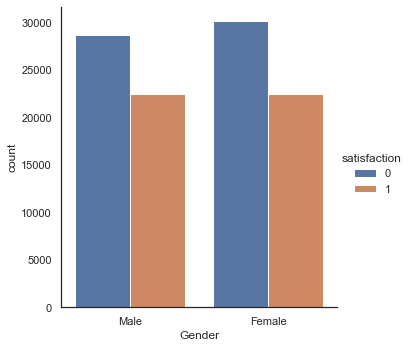

In [26]:
# Kepuasan penumpang berbasis gender
sns.catplot(data= df, x='Gender', hue='satisfaction', kind='count')
plt.savefig('Gender.png')
plt.show()

In [27]:
(pd.crosstab(index=[df['Gender']], columns=df['satisfaction'], normalize=True, margins=True) * 100).round(2)

satisfaction,0,1,All
Gender,,,
Female,29.06,21.69,50.75
Male,27.60,21.65,49.25
All,56.66,43.34,100.00


## Insight 4:
Grafik menunjukkan jumlah penumpang Pria dan Wanita yang puas dengan maskapai penerbangan ini sama banyak, yaitu sekitar 21%. Selain itu penumpang wanita lebih banyak yang netral atau tidak puas sebanyak 29% terhadap maskapai penerbangan daripada penumpang laki-laki. 

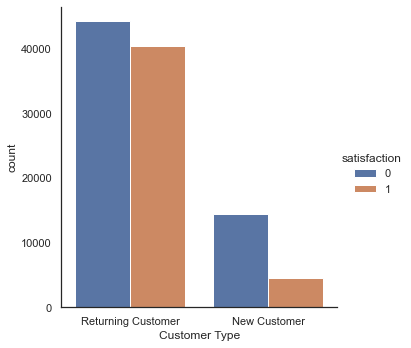

In [28]:
#Bagaimana tipe customer (Returning atau New) mempengaruhi kepuasan?
sns.catplot(data= df, x='Customer Type', hue='satisfaction', kind='count')
plt.savefig('Customer Type.png')
plt.show()

In [29]:
(pd.crosstab(index=[df['Customer Type']], columns=df['satisfaction'], normalize=True, margins=True) * 100).round(2)

satisfaction,0,1,All
Customer Type,,,
New Customer,13.95,4.33,18.28
Returning Customer,42.71,39.01,81.72
All,56.66,43.34,100.00


## Insight 5:
Grafik menunjukkan proporsi data jumlah penumpang Returning Customer lebih banyak 4 kali lipat dari penumpang New Customer. Penumpang Returning Customer yang netral atau tidak puas lebih banyak dengan selisih 3.7% dari penumpang Returning Customer yang puas. Pada penumpang tipe New Customer yang netral atau tidak puas lebih banyak 3 kali lipat dari yang puas

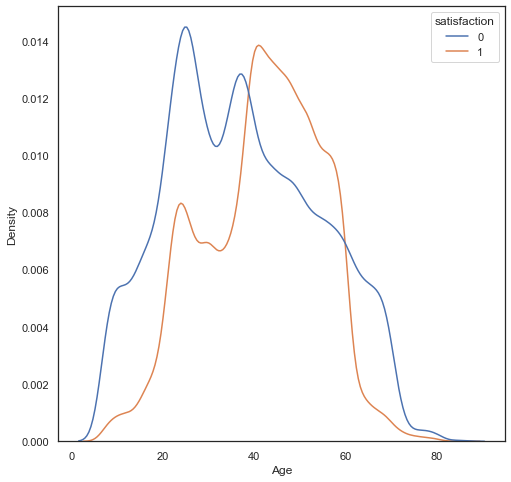

In [30]:
#Apakah umur customer mempengaruhi kepuasan?
plt.figure(figsize=(8,8))
sns.kdeplot(data= df, x='Age', hue='satisfaction')
plt.savefig('Age.png')
plt.show()

## Insight 6:
Grafik menunjukkan pelanggan yang puas terhadap maskapai penerbangan ini didominasi oleh pelanggan yang berusia antara 40-60 tahun, tergolong usia senior. Namun pelanggan yang netral atau tidak puas terhadap maskapai penerbangan ini didominasi oleh pelanggan berusia 20-40, tergolong usia dewasa muda.

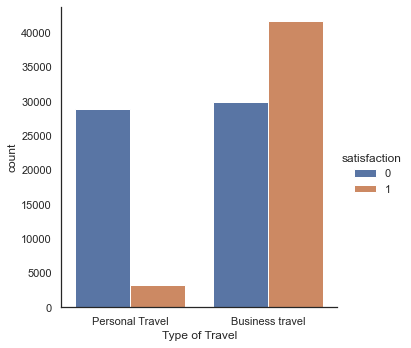

In [31]:
#Apakah tipe perjalanan mempengaruhi kepuasan?
sns.catplot(data= df, x='Type of Travel', hue='satisfaction', kind='count')
plt.savefig('Type of Travel.png')
plt.show()

In [32]:
(pd.crosstab(index=[df['Type of Travel']], columns=df['satisfaction'], normalize=True, margins=True) * 100).round(2)

satisfaction,0,1,All
Type of Travel,,,
Business travel,28.80,40.19,68.99
Personal Travel,27.86,3.15,31.01
All,56.66,43.34,100.00


## Insight 7:
Grafik menunjukkan pelanggan dengan tipe perjalanan Business mendominasi data yaitu 68.99% dari keseluruhan penumpang. Penumpang tipe perjalanan Business yang puas sebanyak 40.19%, lebih banyak dari yang netral atau tidak puas sebesar 28.80%. Sedangkan pelanggan tipe perjalanan Personal yang netral atau tidak puas sekitar 9 kali lipat dari presentase pelanggan tipe perjalanan Personal yang puas. 

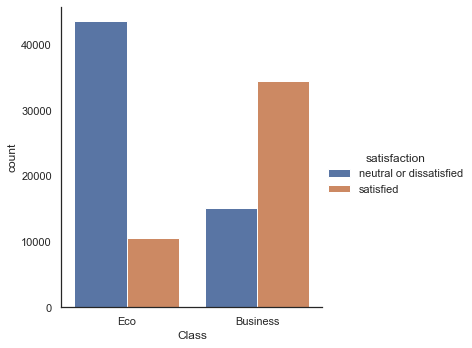

In [33]:
#Apakah kelas mempengaruhi kepuasan penumpang?
df_join = pd.concat([df_eco, df_bu])
sns.catplot(data= df_join, x='Class', hue='satisfaction', kind='count')
plt.savefig('Class.png')
plt.show()

In [34]:
(pd.crosstab(index=[df_join['Class']], columns=df['satisfaction'], normalize=True, margins=True) * 100).round(2)

satisfaction,0,1,All
Class,,,
Business,14.62,33.20,47.81
Eco,42.04,10.14,52.19
All,56.66,43.34,100.00


## Insight 8:
Pada grafik data penumpang yang netral atau tidak puas banyak ditemukan pada penumpang kelas Economy yaitu 42% dibandingkan kelas Business yang netral atau tidak puas hanya 1/3 dari penumpang Economy yang netral. Penumpang kelas Business lebih banyak 3 kali lipat yang puas terhadap maskapai penerbangan daripada penumpang kelas Economy yang puas.

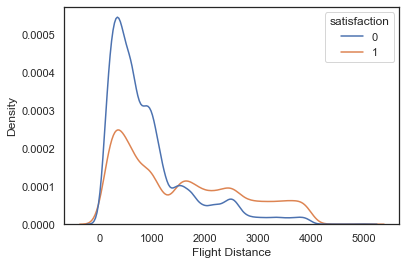

In [35]:
#Apakah jarak penerbangan mempengaruhi kepuasan penumpang?
sns.kdeplot(data= df, x='Flight Distance', hue='satisfaction')
plt.savefig('Flight Distance.png')
plt.show()

## Insight 9:
Pada grafik terlihat bahwa penumpang yang netral atau tidak puas lebih banyak dari penumpang yang puas, konsisten dengan insight sebelumnya (berdasarkan gender dan tipe customer). Data ini didominasi dengan penumpang yang jarak penerbangannya maksimal 1000 miles, lalu data semakin sedikit di jarak penerbangan yang semakin besar. Ini menunjukkan mayoritas penumpang baik yan netral atau tidak puas dan penumpang yang puas melakukan perjalanan kurang dari 1000 miles dan tren kepuasannya konsisten (lebih banyak yang netral atau tidak puas daripada penumpang yang puas)

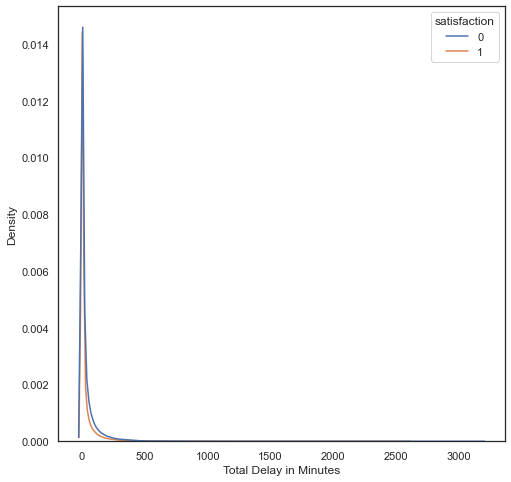

In [36]:
# Apakah lama penundaan penerbangan mempengaruhi kepuasan penumpang?
plt.figure(figsize=(8, 8))
sns.kdeplot(data= df, x='Total Delay in Minutes', hue='satisfaction')
plt.savefig('Total Delay.png')
plt.show()

## Insight 10:
Pada grafik terlihat bahwa data kepuasan pelanggan maskapai yang netral atau tidak puas sama dengan pelanggan maskapai yang puas. Tidak ada tren yang berbeda antara kedua garis sehingga bisa disimpulkan data menunjukkan tidak ada pengaruh antara lama penundaan dengan kepuasan pelanggan

## Analisa:
Dari kedua jenis analisis yaitu Flight Experience yang fokus pada fitur-fitur yang disajikan maskapai dan Customer Satisfaction yang fokus pada karakter kepuasan pelanggan didapatkan:
1. Data ini menunjukkan sebagian besar fitur maskapai mendapat modus skor 4 (puas) namun presentase penumpang yang netral atau tidak puas selalu lebih banyak dari penumpang yang puas, terbukti dari insight analisis Gender, Tipe Perjalanan, Class, Tipe Customer dan Umur penumpang.
2. Data ini menunjukkan fitur terbaik 3 dengan modus skor 4 yaitu Inflight Service (Pelayanan selama penerbangan), Departure/Arrival time convenient (kenyamanan waktu keberangkatan dan pendaratan) serta Seat Comfort (Kenyamanan kursi). Selain fitur terbaik 3, diambil fitur terbawah 3 dengan modus skor 3 yaitu Gate Location (lokasi gerbang), Ease of Online Booking (kemudahan pemesanan secara daring) dan Inflight wifi service (layanan wifi selama penerbangan).
3. Data dibagi menjadi dua sesuai kelas yaitu kelas Economy dan Business untuk mencari apakah ada perbedaan skor kepuasan diantara dua kelas tersebut yang menjadikan fitur tertentu lebih memuaskan daripada yang lain. Hasil menunjukkan tidak ada perbedaan signifikan sehingga dapat disimpulkan perbedaan kelas pesawat tidak memberikan skor fitur yang lebih baik maupun lebih buruk
4. Analisa pada karakter kepuasan pelanggan dapat disimpulkan bahwa:
    - Pelanggan Pria dan Wanita memiliki kecenderungan yang sama dalam menilai kepuasan terhadap maskapai ini
    - Data pelanggan Returning lebih banyak daripada data pelanggan New, sehingga nampak lebih banyak pelanggan yang puas dari pelanggan tipe Returning. Pelanggan Returning yang netral atau tidak puas tetap memakai jasa maskapai ini.
    - Data umur pelanggan yang puas terhadap maskapai ini didominasi oleh umur berkisar 40-60, sedangkan yang netral atau tidak puas ada di range umur 20-40.
    - Data tipe perjalanan Business lebih banyak dari tipe perjalanan Personal dan menunjukkan bahwa maskapai ini memuaskan untuk penumpang yang bertujuan untuk bisnis, sebaliknya berlaku pada penumpang yang bertujuan personal.
    - Data tipe kelas pesawat Economy dan Business hampir sama rata dan menunjukkan bahwa maskapai ini memuaskan di kelas Business dan netral atau tidak memuaskan di kelas Economy
    - Data jarak penerbangan dan waktu penundaan tidak menunjukkan perbedaan kepuasan (garis puas dan garis netral atau tidak puas memiliki tren yang sama)

## Business Recommendations:
Hasil analisa data ini menunjukkan tingkat kepuasan netral atau tidak puas lebih banyak dari pelanggan yang puas sehingga perlu diberikan tindakan yang dapat meningkatkan kepuasan pelanggan maskapai penerbangan seperti:
1. Dikutip dari [Wall Street Journal](https://deloitte.wsj.com/articles/airline-cx-creating-emotional-connections-to-drive-brand-loyalty-1489381338) bahwa pendekatan personal seperti meningkatkan keramahan staff dalam kabin, menawarkan add-on dalam kabin sesuai kebutuhan penumpang (contoh menawarkan fasilitas selimut terhadap penumpang balita dan lansia) serta memberikan info real-time yang jelas sehingga calon penumpang dapat membuat keputusan booking dengan cepat. Pendekatan personal ini akan membuat pelanggan merasa pelayanan maskapai membawa emosi positif sehingga dapat diekpektasikan akan melakukan pemesanan berulang. Rekomendasi ini akan mendukung hasil analisa yang menyatakan pelanggan puas dengan fitur Inflight Service
2. Optimasi gate di airport dengan *sharing between airlines* menjadi solusi yang dipaparkan di [Airport Review](https://www.internationalairportreview.com/news/94224/moving-into-a-new-age-of-airport-gate-management/) dengan mengandalkan sistem otomasi cerdas yang memungkinkan jarak berjalan antar gate lebih nyaman bagi pelanggan maskapai. Selain kenyamanan jarak gate, manajemen gate yang baik dapat menjamin waktu tunda yang lebih singkat sehingga meningkatkan kepuasan pelanggan maskapai.
3. Dari analisis didapatkan bahwa penumpang dengan tujuan perjalanan Personal (wisata) kurang puas dengan pelayanan maskapai. Dikutip dari [Reuters](https://www.reutersevents.com/travel/revenue-and-data-management/4-ways-improve-airline-pricing-practices-holiday-season-and-beyond) maskapai dapat membuat bundling dinamis sesuai dengan data historis yang dimiliki, sehingga dapat membuat segmentasi konsumen tipe Personal dan menawarkan paket yang sesuai dengan seasonality dan besaran grup. 
4. Keputusan untuk meningkatkan layanan wifi dalam kabin pesawat (Inflight wifi service) berhubungan dengan persepsi dan kepuasan pelanggan muda (usia 20-40 tahun). Dilansir dari [European Aviation Network](https://www.europeanaviationnetwork.com/en/news/sky-high-economics-3--capitalising-on-changing-passenger-behaviou.html) pelanggan muda akan menjadi masa depan bagi maskapai penerbangan, mengakibatkan layanan maskapai penerbangan harus mengikuti selera pelanggan ini. Konektivitas yang baik dalam pesawat menjadi kapitalisasi yang penting untuk menjamin persepsi positif pelanggan muda.